In [120]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [103]:
# 载入数据
file_path = 'Database_4c.xlsx'
data = pd.read_excel(file_path)


In [104]:
print(data.columns)

Index(['x1', 'x2', 'x3', 'y1', 'y2', 'y3', 'y_2'], dtype='object')


In [123]:
# 特征和标签
X = data[['x1', 'x2', 'x3']].values
y_spin = data[['y1', 'y2', 'y3']].values
y_wavelength = to_categorical(data['y_2'].values - 1, num_classes=7)  # 减1是因为to_categorical从0开始索引



In [165]:
# 拆分数据集
X_train, X_test, y_spin_train, y_spin_test, y_wavelength_train, y_wavelength_test = train_test_split(
    X, y_spin, y_wavelength, test_size=0.2, random_state=42)# stratify=y_wavelength.argmax(axis=1)


# 模型构建
input_layer = Input(shape=(X.shape[1],))
hidden_layer_1 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
drop_out = Dropout(0.5)(hidden_layer_1)
hidden_layer_2 = Dense(128, activation='relu')(hidden_layer_1)
drop_out = Dropout(0.5)(hidden_layer_2)
hidden_layer_3 = Dense(64, activation='relu')(hidden_layer_2)

  # Spin预测

drop_out = Dropout(0.5)(hidden_layer_3)

hidden_layer_4 = Dense(64, activation='relu')(hidden_layer_3)
drop_out = Dropout(0.5)(hidden_layer_4)
hidden_layer_5 = Dense(64, activation='relu')(drop_out)
spin_output = Dense(3, activation='sigmoid', name='spin_output',kernel_regularizer=l2(0.0001))(hidden_layer_5)
wavelength_output = Dense(y_wavelength.shape[1], activation='softmax', name='wavelength_output')(hidden_layer_5)  # Wavelength预测



In [166]:
# 创建模型
model = Model(inputs=input_layer, outputs=[spin_output, wavelength_output])

# 损失函数：前三个输出用二元交叉熵，最后一个输出用分类交叉熵
losses = {
    'spin_output': 'binary_crossentropy',
    'wavelength_output': 'categorical_crossentropy'
}

# 编译模型
model.compile(optimizer=Adam(), loss=losses, metrics=['accuracy'])



In [167]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [178]:
# 训练模型
model.fit(X_train, [y_spin_train, y_wavelength_train], 
          validation_data=(X_test, [y_spin_test, y_wavelength_test]), 
          epochs=100, 
          batch_size=32)


Epoch 1/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4788 - spin_output_loss: 0.2963 - wavelength_output_loss: 0.1629 - spin_output_accuracy: 0.6562 - wavelength_output_accuracy: 0.9375 - val_loss: 1.0586 - val_spin_output_loss: 0.3311 - val_wavelength_output_loss: 0.7080 - val_spin_output_accuracy: 0.7054 - val_wavelength_output_accuracy: 0.8571
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4686 - spin_output_loss: 0.3004 - wavelength_output_loss: 0.1487 - spin_output_accuracy: 0.6250 - wavelength_output_accuracy: 0.9397 - val_loss: 1.0941 - val_spin_output_loss: 0.3437 - val_wavelength_output_loss: 0.7308 - val_spin_output_accuracy: 0.6518 - val_wavelength_output_accuracy: 0.8571
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4140 - spin_output_loss: 0.2865 - wavelength_output_loss: 0.1079 - spin_output_accuracy: 0.6607 - wavelength_output_accuracy: 0.9487 - val_loss: 1.0913 - val_spin_output_loss: 0.3363 

In [179]:
# evaluate the model
loss, spin_loss, wavelength_loss, spin_accuracy, wavelength_accuracy = model.evaluate(X_test, [y_spin_test, y_wavelength_test])
print('Loss:', loss)
print('Spin Loss:', spin_loss)
print('Wavelength Loss:', wavelength_loss)
print('Spin Accuracy:', spin_accuracy)
print('Wavelength Accuracy:', wavelength_accuracy)



4/4 [==============================] - 0s 2ms/step - loss: 1.1012 - spin_output_loss: 0.3294 - wavelength_output_loss: 0.7519 - spin_output_accuracy: 0.6696 - wavelength_output_accuracy: 0.8661
Loss: 1.1011581420898438
Spin Loss: 0.3293581008911133
Wavelength Loss: 0.7519415020942688
Spin Accuracy: 0.6696428656578064
Wavelength Accuracy: 0.8660714030265808


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 3)]                  0         []                            
                                                                                                  
 dense_52 (Dense)            (None, 64)                   256       ['input_12[0][0]']            
                                                                                                  
 dense_53 (Dense)            (None, 128)                  8320      ['dense_52[0][0]']            
                                                                                                  
 dense_54 (Dense)            (None, 64)                   8256      ['dense_53[0][0]']            
                                                                                           

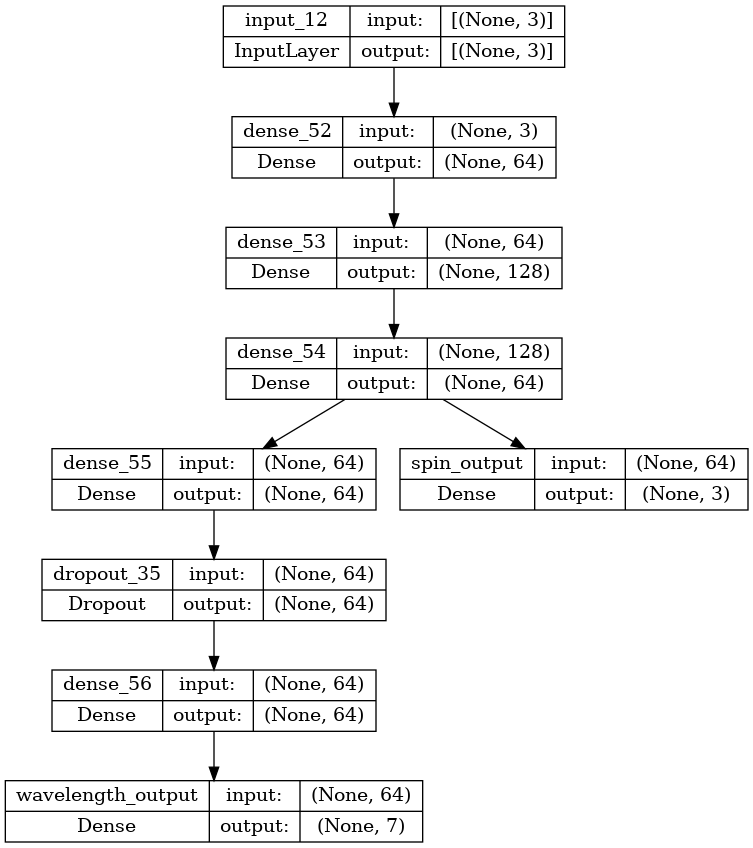

In [158]:
model.summary()
# draw the model

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

# save the model
model.save('model.h5')  


1/1 [==============================] - 0s 61ms/step


2024-03-31 16:30:24.771931: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 32ms/step


2024-03-31 16:31:54.203150: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 32ms/step


2024-03-31 16:36:14.337646: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 33ms/step


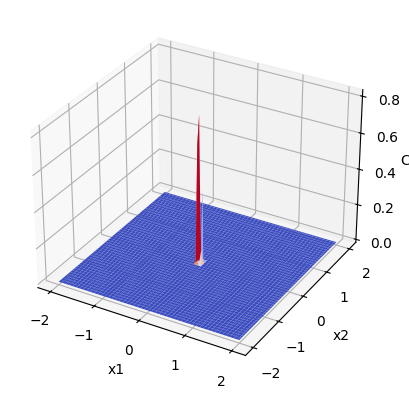

In [61]:
# # draw the landscape of cost function
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# # 生成数据
# x = np.linspace(-2, 2, 100)
# y = np.linspace(-2, 2, 100)
# x, y = np.meshgrid(x, y)
# z = np.zeros(x.shape)

# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#         z[i, j] = model.predict(np.array([[x[i, j], y[i, j], 0]]))[1][0][0]

# # 绘制3D图
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, cmap=cm.coolwarm)
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('Cost')
# plt.show()


In [ ]:
# #  draw the landscape of the accuracy function
# # 生成数据
# x = np.linspace(-2, 2, 100)
# y = np.linspace(-2, 2, 100)
# x, y = np.meshgrid(x, y)
# z = np.zeros(x.shape)

# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#         z[i, j] = model.predict(np.array([[x[i, j], y[i, j], 0]]))[1][0][1]

# # 绘制3D图
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, cmap=cm.coolwarm)
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('Accuracy')
# plt.show()


In [184]:
# draw the accuracy of the model
from sklearn.metrics import accuracy_score

y_pred_w = model.predict(X_test)[1] # 取出Wavelength的预测结果
y_pred_w = np.argmax(y_pred_w, axis=1) + 1  # 取出最大值的索引，加1是因为to_categorical从0开始索引
y_true_w = np.argmax(y_wavelength_test, axis=1) + 1

accuracy = accuracy_score(y_true_w, y_pred_w)
print('Accuracy:', accuracy)




4/4 [==============================] - 0s 2ms/step
Accuracy: 0.8660714285714286


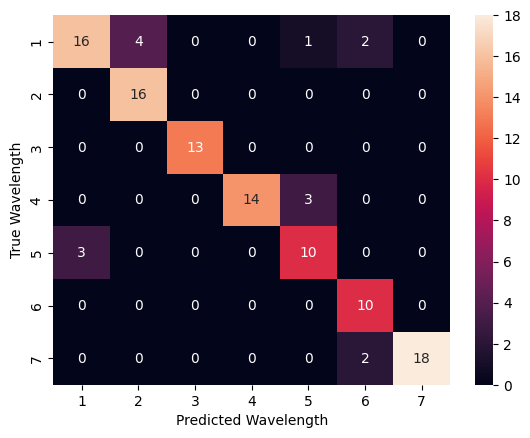

4/4 [==============================] - 0s 1ms/step


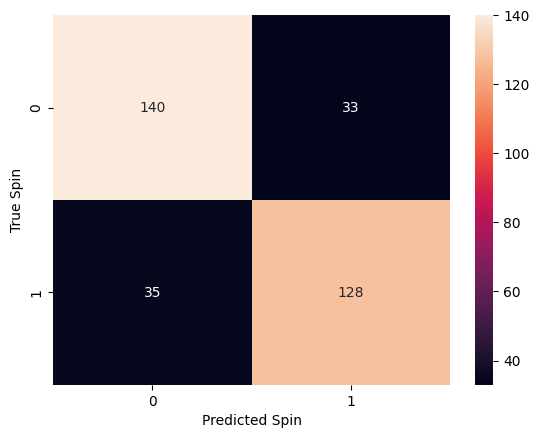

In [189]:
# draw the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()

confusion = confusion_matrix(y_true_w, y_pred_w)
sns.heatmap(confusion, annot=True, fmt='d')
# chaneg the x,y from 1-7
plt.xticks(np.arange(7) + 0.5, range(1, 8))
plt.yticks(np.arange(7) + 0.5, range(1, 8))
# add the unit（um） of x,y axis

plt.xlabel('Predicted Wavelength')
plt.ylabel('True Wavelength')
plt.show()

# draw the confusion matrix of spin

y_pred_s = model.predict(X_test)[0]  # 取出Spin的预测结果
y_pred_s = np.round(y_pred_s)
y_true_s = y_spin_test

confusion = confusion_matrix(y_true_s.flatten(), y_pred_s.flatten())
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted Spin')
plt.ylabel('True Spin')
plt.show()


4/4 [==============================] - 0s 895us/step


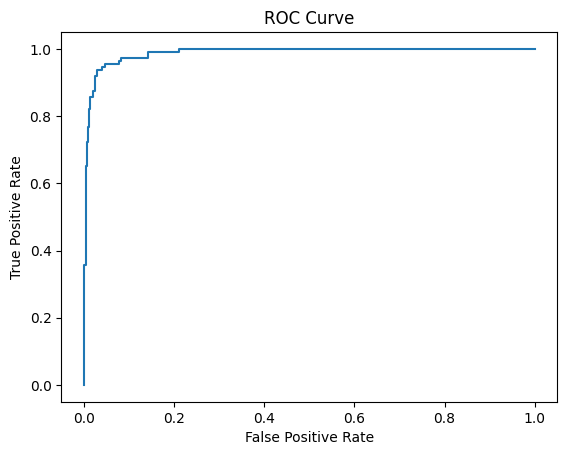

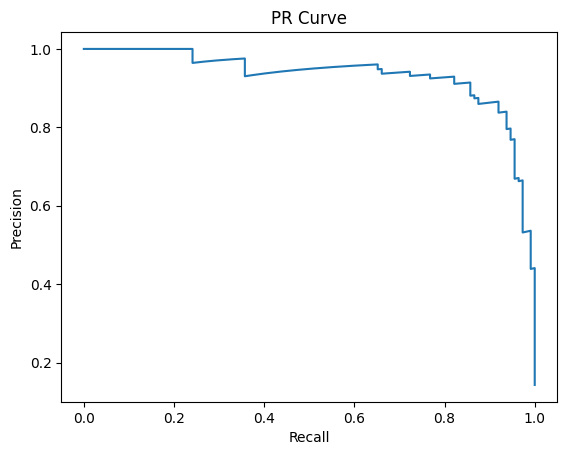

In [163]:
# draw the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)[1]
fpr, tpr, thresholds = roc_curve(y_wavelength_test.ravel(), y_pred.ravel())
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# draw the PR curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_wavelength_test.ravel(), y_pred.ravel())
plt.plot(recall, precision)
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


4/4 [==============================] - 0s 2ms/step


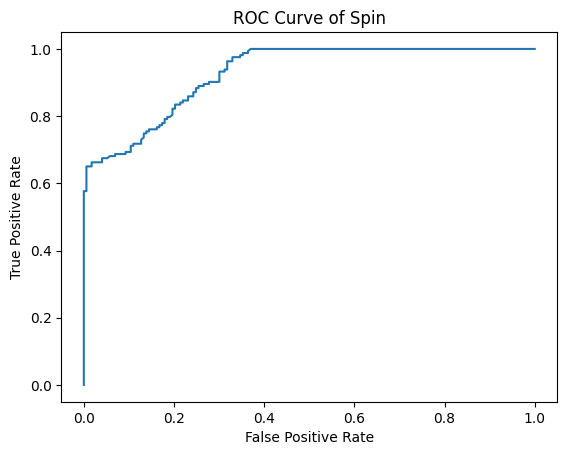

4/4 [==============================] - 0s 1ms/step


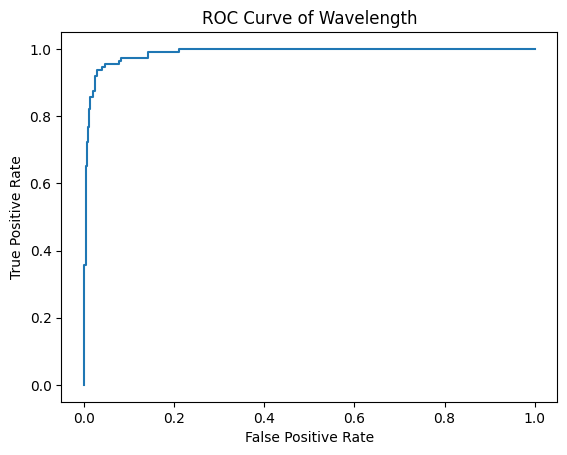

In [164]:
#  plot the roc curve of spine and wavelength
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_spin = model.predict(X_test)[0]
fpr, tpr, thresholds = roc_curve(y_spin_test.ravel(), y_pred_spin.ravel())
plt.plot(fpr, tpr)
plt.title('ROC Curve of Spin')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

y_pred_wavelength = model.predict(X_test)[1]
fpr, tpr, thresholds = roc_curve(y_wavelength_test.ravel(), y_pred_wavelength.ravel())
plt.plot(fpr, tpr)
plt.title('ROC Curve of Wavelength')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
